<a href="https://colab.research.google.com/github/SondipPoulSingh/Machine-Learning/blob/main/cats_vs_dogs_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing dataset from kaggle

In [9]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [10]:
! kaggle datasets download -d salader/dogs-vs-cats
# command from the dataset API https://www.kaggle.com/datasets/salader/dogs-vs-cats

100% 1.06G/1.06G [00:06<00:00, 241MB/s]
100% 1.06G/1.06G [00:06<00:00, 186MB/s]


In [11]:
from zipfile import ZipFile

In [12]:
with ZipFile('/content/dogs-vs-cats.zip','r') as zip:
  zip.extractall('/content')

### Generator


If the RAM is not sufficient then it creates problem to load all the images to the model.The reason of using generator is to load a subsample of images instead of loading all the images at the same time. image_dataset_from_directory is one of the generators provided by keras.<br>
***official documentation:***
https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory

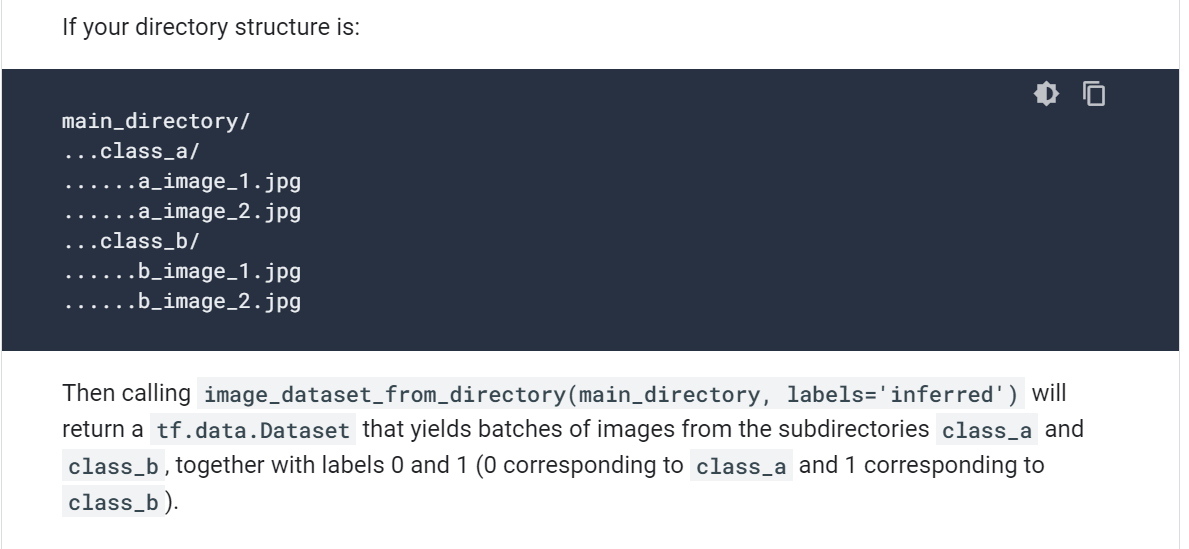

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [14]:
train_datagen = tf.keras.utils.image_dataset_from_directory(
    '/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256),
    )

test_datagen = tf.keras.utils.image_dataset_from_directory(
    '/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256),
    )

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


Here train_datagen and test_datagen works as generator. Each time they load a batch_size of 32 images. Generators remembers where they finish each time. so all the image batchs take places one after another. Both generator loads images as numpy array and the pixel values lie between 0-255.

In [15]:
# Normalizing the generator data
def normalize(image, label):
  data = tf.cast(image/255. ,tf.float32)
  return image,label

train_datagen_normalized = train_datagen.map(normalize)
test_datagen_normalized = test_datagen.map(normalize)

### CNN Model

In [24]:
model = Sequential()
model.add(Conv2D(32,(3,3),strides=(1, 1),padding='valid',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(64,(3,3),strides=(1, 1),padding='valid',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(128,(3,3),strides=(1, 1),padding='valid',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))


In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [26]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy']
              )

In [27]:
history = model.fit(train_datagen_normalized, epochs=5, validation_data=test_datagen_normalized)

Epoch 1/5
625/625 [==============================] - 69s 108ms/step - loss: 1.2102 - accuracy: 0.5505 - val_loss: 0.7060 - val_accuracy: 0.5586
Epoch 2/5
625/625 [==============================] - 68s 107ms/step - loss: 0.6534 - accuracy: 0.6064 - val_loss: 0.6006 - val_accuracy: 0.6664
Epoch 3/5
625/625 [==============================] - 67s 107ms/step - loss: 0.6408 - accuracy: 0.6422 - val_loss: 0.6515 - val_accuracy: 0.6216
Epoch 4/5
625/625 [==============================] - 67s 107ms/step - loss: 0.6006 - accuracy: 0.6755 - val_loss: 0.5637 - val_accuracy: 0.6998
Epoch 5/5
625/625 [==============================] - 68s 108ms/step - loss: 0.5285 - accuracy: 0.7347 - val_loss: 0.5402 - val_accuracy: 0.7314


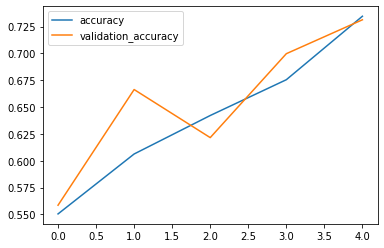

In [28]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='validation_accuracy')
plt.legend()
plt.show()

### Testing

In [47]:
import cv2

In [73]:
img = cv2.imread('/content/dog.jpg')

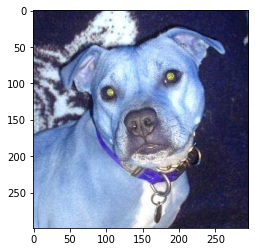

In [74]:
plt.imshow(img)

In [75]:
img.shape

(299, 296, 3)

In [76]:
res_img = cv2.resize(img,(256,256))

In [77]:
final_img = res_img.reshape((1,256,256,3))

In [78]:
import numpy as np
np.round(model.predict(final_img)) # 0 means cat, 1 means dog

1/1 [==============================] - 0s 19ms/step


array([[1.]], dtype=float32)